In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
df.shape

(10000, 50)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [5]:
df['Zip'] = df['Zip'].astype('object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  object 
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [7]:
df.duplicated().sum()

0

In [8]:
numeric_cols = [col for col in df.columns[4:] if df[col].dtype in ['int64', 'float64']]
print(numeric_cols)
print(len(numeric_cols))

['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
21


In [9]:
numeric_df = df[numeric_cols]
numeric_df.head()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,56.25100,-133.37571,38,0,68,28561.99,7.978323,10,0,1,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,44.32893,-84.24080,10446,1,27,21704.77,11.699080,12,0,1,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,45.35589,-123.24657,3735,4,50,9609.57,10.752800,9,0,1,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,32.96687,-117.24798,13863,1,48,18925.23,14.913540,15,2,0,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,29.38012,-95.80673,11352,0,83,40074.19,8.147417,16,2,1,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [11]:
for col1 in numeric_df.columns:
    for col2 in numeric_df.columns:
        if col1 != col2 and abs(stats.pearsonr(numeric_df[col1], numeric_df[col2])[0]) >= 0.1:
            print(f'{col1} vs. {col2}: ', stats.pearsonr(numeric_df[col1], numeric_df[col2]))

Lat vs. Lng:  (-0.10063944229014526, 6.223383081418381e-24)
Lat vs. Population:  (-0.220598060318282, 1.778200134925588e-110)
Lng vs. Lat:  (-0.10063944229014526, 6.223383081418381e-24)
Population vs. Lat:  (-0.220598060318282, 1.778200134925588e-110)
Tenure vs. Bandwidth_GB_Year:  (0.9914951921640129, 0.0)
Bandwidth_GB_Year vs. Tenure:  (0.9914951921640129, 0.0)
Item1 vs. Item2:  (0.6630687413300227, 0.0)
Item1 vs. Item3:  (0.5780125331949684, 0.0)
Item1 vs. Item6:  (0.4028036981519133, 0.0)
Item1 vs. Item7:  (0.3367822736634492, 1.0246719102753442e-263)
Item1 vs. Item8:  (0.29272789873780514, 8.753819923988329e-197)
Item2 vs. Item1:  (0.6630687413300227, 0.0)
Item2 vs. Item3:  (0.5201942172468204, 0.0)
Item2 vs. Item6:  (0.36324700281010797, 1.351097771498133e-309)
Item2 vs. Item7:  (0.3003239041015098, 1.6140328623710415e-207)
Item2 vs. Item8:  (0.25425934518003085, 2.5172181347520645e-147)
Item3 vs. Item1:  (0.5780125331949684, 0.0)
Item3 vs. Item2:  (0.5201942172468204, 0.0)
Item3

In [13]:
for col1 in numeric_df.columns:
    for col2 in numeric_df.columns:
        if col1 != col2 and abs(stats.spearmanr(numeric_df[col1], numeric_df[col2])[0]) >= 0.1:
            print(f'{col1} vs. {col2}: ', stats.spearmanr(numeric_df[col1], numeric_df[col2]))

Lat vs. Population:  SpearmanrResult(correlation=-0.19878887528374237, pvalue=1.1706197920105714e-89)
Population vs. Lat:  SpearmanrResult(correlation=-0.19878887528374237, pvalue=1.1706197920105714e-89)
Tenure vs. Bandwidth_GB_Year:  SpearmanrResult(correlation=0.9691556103131859, pvalue=0.0)
MonthlyCharge vs. Bandwidth_GB_Year:  SpearmanrResult(correlation=0.10057778623868896, pvalue=6.629756061436008e-24)
Bandwidth_GB_Year vs. Tenure:  SpearmanrResult(correlation=0.9691556103131859, pvalue=0.0)
Bandwidth_GB_Year vs. MonthlyCharge:  SpearmanrResult(correlation=0.10057778623868897, pvalue=6.629756061435914e-24)
Item1 vs. Item2:  SpearmanrResult(correlation=0.650164369335597, pvalue=0.0)
Item1 vs. Item3:  SpearmanrResult(correlation=0.5652647956616733, pvalue=0.0)
Item1 vs. Item6:  SpearmanrResult(correlation=0.39231715352475044, pvalue=0.0)
Item1 vs. Item7:  SpearmanrResult(correlation=0.3269552981392377, pvalue=8.654368137183868e-248)
Item1 vs. Item8:  SpearmanrResult(correlation=0.2

In [14]:
for col in numeric_df.columns:
    print(col, stats.shapiro(numeric_df[col]))

Lat ShapiroResult(statistic=0.9601455926895142, pvalue=1.401298464324817e-45)
Lng ShapiroResult(statistic=0.9020202159881592, pvalue=0.0)
Population ShapiroResult(statistic=0.6966826915740967, pvalue=0.0)
Children ShapiroResult(statistic=0.836870014667511, pvalue=0.0)
Age ShapiroResult(statistic=0.9543271064758301, pvalue=0.0)
Income ShapiroResult(statistic=0.8934258222579956, pvalue=0.0)
Outage_sec_perweek ShapiroResult(statistic=0.9997866749763489, pvalue=0.4358324408531189)
Email ShapiroResult(statistic=0.9906892776489258, pvalue=4.795065374406501e-25)
Contacts ShapiroResult(statistic=0.8337748050689697, pvalue=0.0)
Yearly_equip_failure ShapiroResult(statistic=0.6415181159973145, pvalue=0.0)
Tenure ShapiroResult(statistic=0.8307580947875977, pvalue=0.0)
MonthlyCharge ShapiroResult(statistic=0.9796265363693237, pvalue=1.9805499953835702e-35)
Bandwidth_GB_Year ShapiroResult(statistic=0.8582534193992615, pvalue=0.0)
Item1 ShapiroResult(statistic=0.9216778874397278, pvalue=0.0)
Item2 Sh

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [15]:
cols_to_drop = [col for col in numeric_df.columns if col in ['Lat','Lng'] or col.startswith('Item')]
print(cols_to_drop)

['Lat', 'Lng', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']


In [16]:
numeric_df = numeric_df.drop(cols_to_drop, axis=1)
numeric_df.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110
1,10446,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766
2,3735,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961
3,13863,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412
4,11352,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436


In [17]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(numeric_df)

df_scaled = pd.DataFrame(df_scaled, columns=numeric_df.columns)

df_scaled.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.673405,-0.972338,0.720925,-0.398778,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487
1,0.047772,-0.506592,-1.259957,-0.641954,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876
2,-0.417238,0.890646,-0.148730,-1.070885,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138
3,0.284537,-0.506592,-0.245359,-0.740525,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857
4,0.110549,-0.972338,1.445638,0.009478,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184


In [18]:
pca = PCA()

df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df_scaled.columns))])

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.532639,0.119512,-1.562116,0.136206,0.414997,-1.399578,0.191106,-0.130913,-0.527627,0.045657,-0.026622
1,-1.659019,0.130539,0.638301,-1.375658,0.723705,-1.271899,0.575596,0.474031,-0.826669,1.302704,-0.038360
2,-0.900522,1.191402,-0.193081,-0.495760,1.308798,-1.158699,-0.434070,-0.004835,0.466449,-0.297649,0.060825
3,-0.942314,-1.138090,1.264619,0.039044,0.394403,0.898011,-1.516688,-0.434394,-0.730167,-0.734906,0.130009
4,-1.929748,-1.434578,-0.984405,1.102943,0.459296,0.611698,0.333212,-1.448501,-0.347708,0.279139,-0.056541


In [19]:
loadings_df = pd.DataFrame(pca.components_.T, columns=df_pca.columns, index=df_scaled.columns)

loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Population,-0.006007,-0.275637,0.267636,0.422474,0.394930,0.243871,0.175784,0.614035,0.138379,0.177040,-0.000347
Children,0.014172,0.517059,0.343248,-0.076204,0.164533,0.164376,0.180459,-0.184798,0.672256,-0.188740,-0.021587
Age,0.001643,-0.457819,-0.418590,0.198972,0.126614,-0.087791,0.343081,-0.203859,0.273259,-0.563400,0.022369
Income,0.004414,0.254938,-0.268952,-0.077133,-0.318506,0.641985,0.484459,0.182477,-0.254842,-0.100837,-0.000938
Outage_sec_perweek,0.005850,-0.212600,0.336483,-0.587558,0.345667,0.197563,-0.116979,0.098387,-0.285041,-0.482900,0.000283
Email,-0.020887,-0.195432,0.526029,0.311468,-0.045059,0.135906,0.308044,-0.597955,-0.325796,0.092556,0.000252
Contacts,0.004148,-0.427624,-0.107344,-0.162242,-0.123928,0.587837,-0.376069,-0.245083,0.366164,0.287739,-0.000941
Yearly_equip_failure,0.017593,0.169549,-0.385120,-0.135015,0.729850,0.071878,0.158048,-0.277655,-0.159744,0.372774,-0.000097
Tenure,0.705405,-0.006554,-0.007865,0.048500,0.000291,0.009174,-0.030141,-0.007482,-0.027041,-0.027774,-0.705263
MonthlyCharge,0.040448,-0.294988,0.112548,-0.530093,-0.172686,-0.292148,0.555192,0.097520,0.203935,0.375603,-0.045756


In [20]:
covariance_matrix = np.dot(df_scaled.T, df_scaled) / df_scaled.shape[0]
print(covariance_matrix)

[[ 1.         -0.00587685  0.01053827 -0.00863859  0.00548327  0.01796155
   0.00401876 -0.0044829  -0.00355944 -0.00477827 -0.00390183]
 [-0.00587685  1.         -0.02973154  0.00994235  0.00188926  0.0044788
  -0.02077603  0.00732059 -0.00509132 -0.0097814   0.02558482]
 [ 0.01053827 -0.02973154  1.         -0.0040906  -0.00804672  0.00158792
   0.01506762  0.00857735  0.01697927  0.01072851 -0.01472365]
 [-0.00863859  0.00994235 -0.0040906   1.         -0.01001055 -0.0092675
   0.0012332   0.00542328  0.00211437 -0.00301396  0.00367355]
 [ 0.00548327  0.00188926 -0.00804672 -0.01001055  1.          0.00399373
   0.01509168  0.00290873  0.00293196  0.02049607  0.00417566]
 [ 0.01796155  0.0044788   0.00158792 -0.0092675   0.00399373  1.
   0.00304036 -0.01635434 -0.01446788  0.00199655 -0.01457915]
 [ 0.00401876 -0.02077603  0.01506762  0.0012332   0.01509168  0.00304036
   1.         -0.00603225  0.00282009  0.00425865  0.00329872]
 [-0.0044829   0.00732059  0.00857735  0.00542328  

In [21]:
eigenvalues = [np.dot(eigenvector.T, np.dot(covariance_matrix, eigenvector)) for eigenvector in pca.components_]
print(eigenvalues)

[1.9941695255752494, 1.057338878788185, 1.0294654984459692, 1.0186425027445065, 1.003289746118091, 0.9979172957375998, 0.9914283518362513, 0.97879769440762, 0.9640901237899593, 0.9593933514326786, 0.005467031123887687]


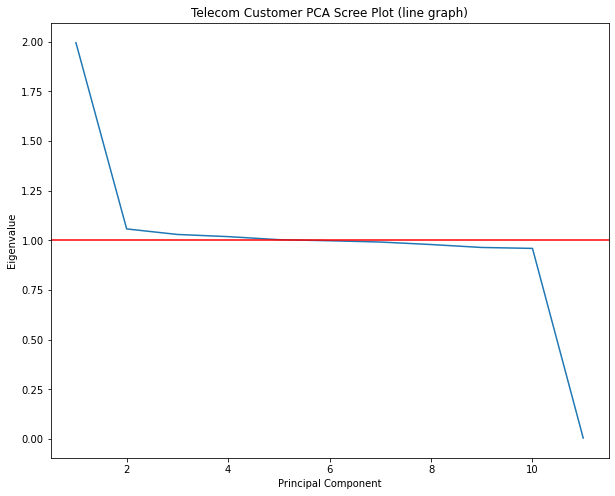

In [22]:
plt.figure(figsize=(10,8))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues)
plt.axhline(y=1, color='red')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Telecom Customer PCA Scree Plot (line graph)')
plt.show()

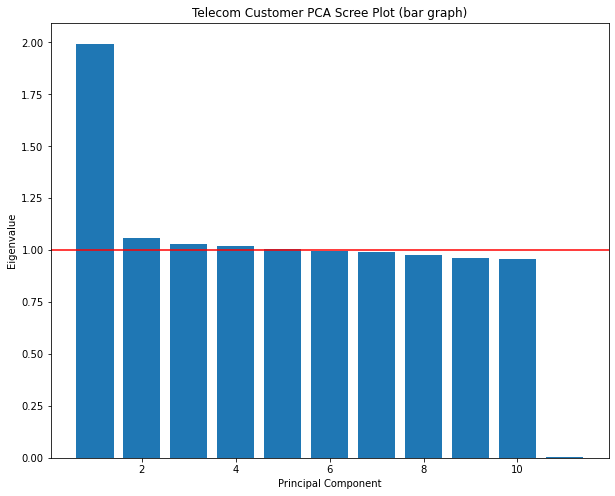

In [23]:
plt.figure(figsize=(10,8))
plt.bar(range(1, len(eigenvalues)+1), eigenvalues)
plt.axhline(y=1, color='red')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Telecom Customer PCA Scree Plot (bar graph)')
plt.show()

In [24]:
proportion_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(proportion_explained_variance)

[0.18128814 0.27740985 0.37099763 0.46360149 0.55480965 0.6455294
 0.73565925 0.82464086 0.91228542 0.999503   1.        ]


In [25]:
actual_explained_variance = np.cumsum(pca.explained_variance_)
print(actual_explained_variance)

[ 1.99436896  3.05181359  4.08138204  5.10012642  6.1035165   7.1015336
  8.09306111  9.07195669 10.03614323 10.99563253 11.00110011]


In [46]:
print(pca.explained_variance_ratio_[:5])

[0.18128814 0.09612172 0.09358777 0.09260386 0.09120816]


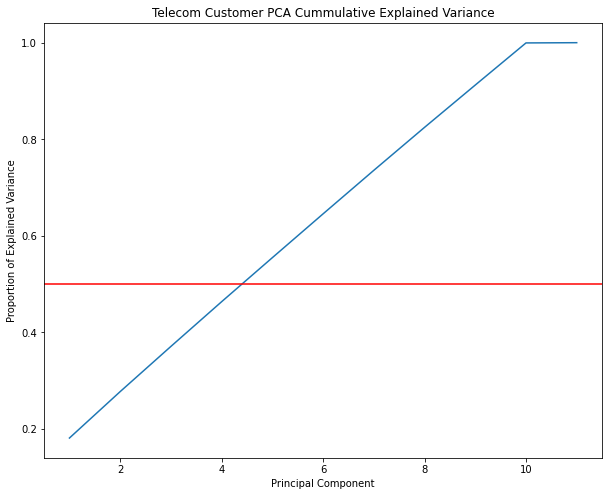

In [26]:
plt.figure(figsize=(10,8))
plt.plot(range(1, len(proportion_explained_variance)+1), proportion_explained_variance)
plt.axhline(y=0.5, color='red')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')
plt.title('Telecom Customer PCA Cummulative Explained Variance')
plt.show()

In [27]:
eigenvalues_to_keep = [e for e in eigenvalues if e >= 1.0]
print(eigenvalues_to_keep)
print(len(eigenvalues_to_keep))

[1.9941695255752494, 1.057338878788185, 1.0294654984459692, 1.0186425027445065, 1.003289746118091]
5


In [30]:
print(np.cumsum(pca.explained_variance_ratio_[:len(eigenvalues_to_keep)])[-1])

0.5548096501519999


In [31]:
print(np.cumsum(pca.explained_variance_ratio_[:len(eigenvalues_to_keep)]))

[0.18128814 0.27740985 0.37099763 0.46360149 0.55480965]


In [32]:
principal_components = df_pca[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]
principal_components.head()

,PC1,PC2,PC3,PC4,PC5
0,-1.532639,0.119512,-1.562116,0.136206,0.414997
1,-1.659019,0.130539,0.638301,-1.375658,0.723705
2,-0.900522,1.191402,-0.193081,-0.495760,1.308798
3,-0.942314,-1.138090,1.264619,0.039044,0.394403
4,-1.929748,-1.434578,-0.984405,1.102943,0.459296


In [33]:
principal_components_loadings = loadings_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]
principal_components_loadings

,PC1,PC2,PC3,PC4,PC5
Population,-0.006007,-0.275637,0.267636,0.422474,0.394930
Children,0.014172,0.517059,0.343248,-0.076204,0.164533
Age,0.001643,-0.457819,-0.418590,0.198972,0.126614
Income,0.004414,0.254938,-0.268952,-0.077133,-0.318506
Outage_sec_perweek,0.005850,-0.212600,0.336483,-0.587558,0.345667
Email,-0.020887,-0.195432,0.526029,0.311468,-0.045059
Contacts,0.004148,-0.427624,-0.107344,-0.162242,-0.123928
Yearly_equip_failure,0.017593,0.169549,-0.385120,-0.135015,0.729850
Tenure,0.705405,-0.006554,-0.007865,0.048500,0.000291
MonthlyCharge,0.040448,-0.294988,0.112548,-0.530093,-0.172686


In [34]:
total_df = pd.concat([df, principal_components], axis=1)
total_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,Item4,Item5,Item6,Item7,Item8,PC1,PC2,PC3,PC4,PC5
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,3,4,4,3,4,-1.532639,0.119512,-1.562116,0.136206,0.414997
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,3,4,3,4,4,-1.659019,0.130539,0.638301,-1.375658,0.723705
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,4,4,3,3,3,-0.900522,1.191402,-0.193081,-0.495760,1.308798
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,2,5,4,3,3,-0.942314,-1.138090,1.264619,0.039044,0.394403
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,3,4,4,4,5,-1.929748,-1.434578,-0.984405,1.102943,0.459296


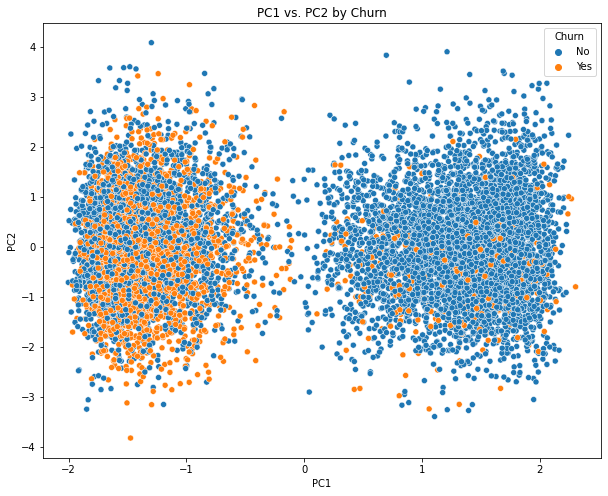

In [35]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue='Churn', data=total_df)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs. PC2 by Churn')
plt.show()

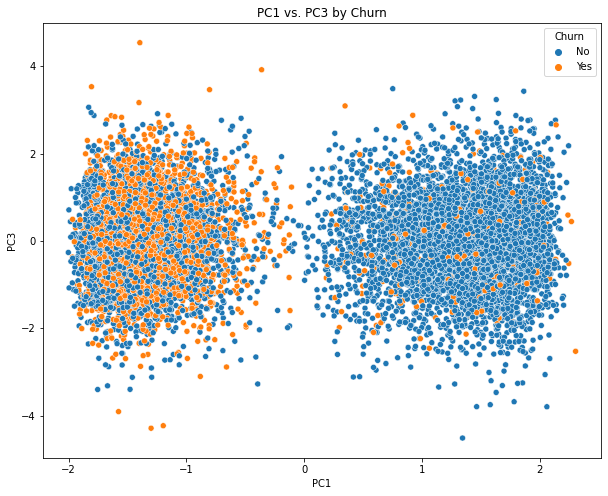

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC3', hue='Churn', data=total_df)
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PC1 vs. PC3 by Churn')
plt.show()

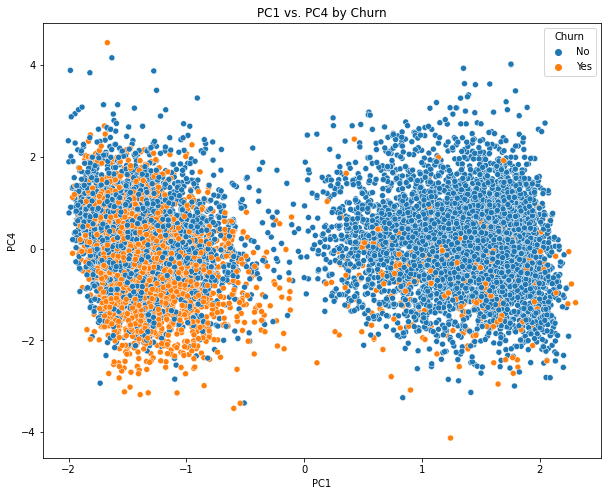

In [37]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC4', hue='Churn', data=total_df)
plt.xlabel('PC1')
plt.ylabel('PC4')
plt.title('PC1 vs. PC4 by Churn')
plt.show()

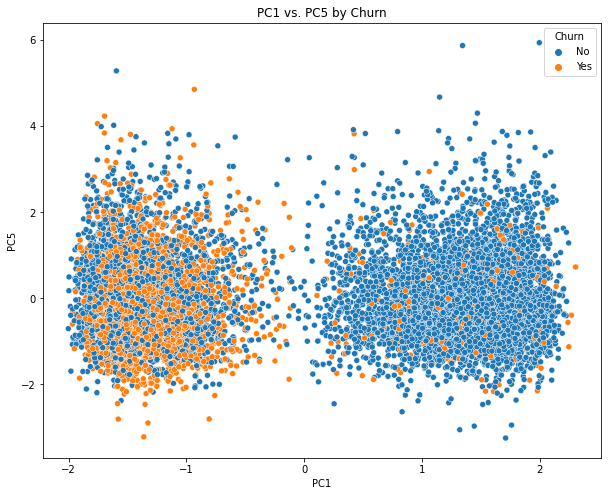

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC5', hue='Churn', data=total_df)
plt.xlabel('PC1')
plt.ylabel('PC5')
plt.title('PC1 vs. PC5 by Churn')
plt.show()

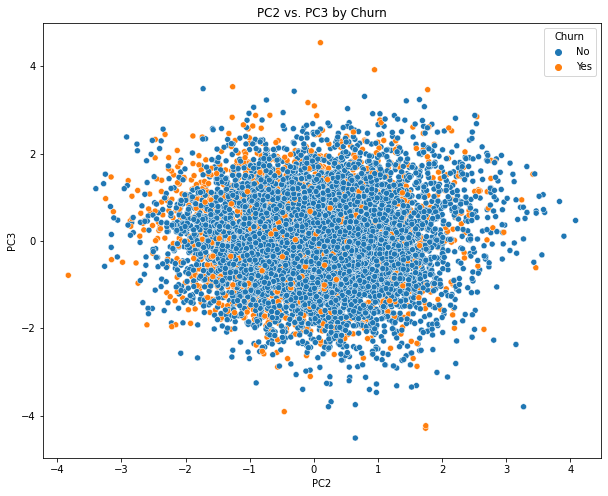

In [39]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC2', y='PC3', hue='Churn', data=total_df)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PC2 vs. PC3 by Churn')
plt.show()

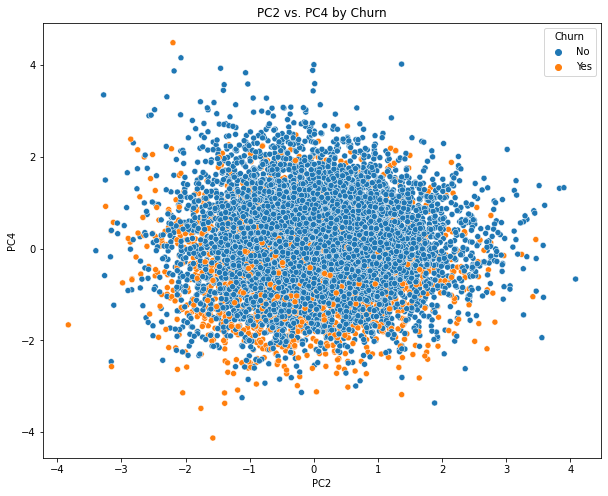

In [40]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC2', y='PC4', hue='Churn', data=total_df)
plt.xlabel('PC2')
plt.ylabel('PC4')
plt.title('PC2 vs. PC4 by Churn')
plt.show()

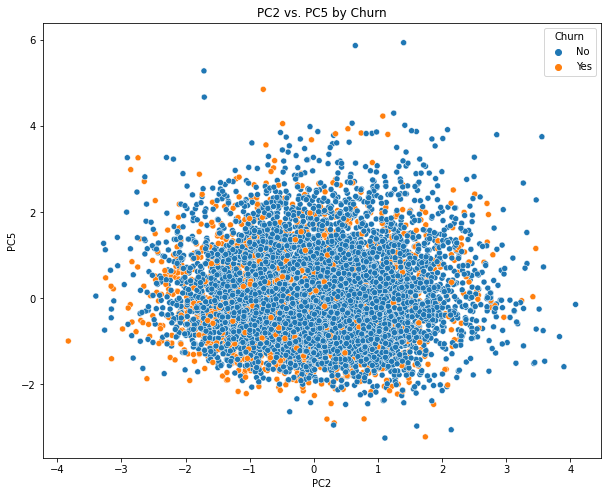

In [41]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC2', y='PC5', hue='Churn', data=total_df)
plt.xlabel('PC2')
plt.ylabel('PC5')
plt.title('PC2 vs. PC5 by Churn')
plt.show()

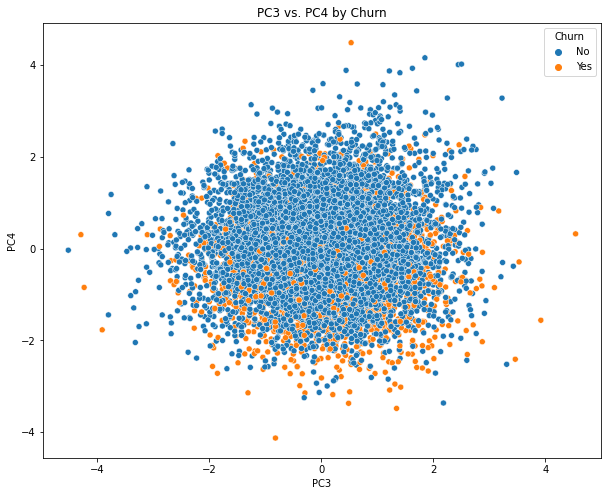

In [42]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC3', y='PC4', hue='Churn', data=total_df)
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('PC3 vs. PC4 by Churn')
plt.show()

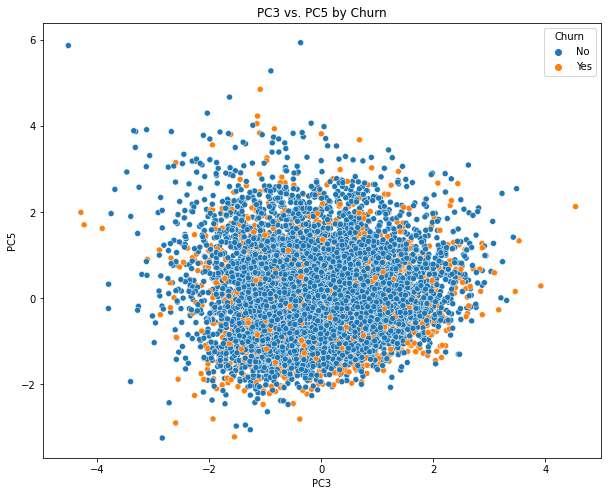

In [43]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC3', y='PC5', hue='Churn', data=total_df)
plt.xlabel('PC3')
plt.ylabel('PC5')
plt.title('PC3 vs. PC5 by Churn')
plt.show()

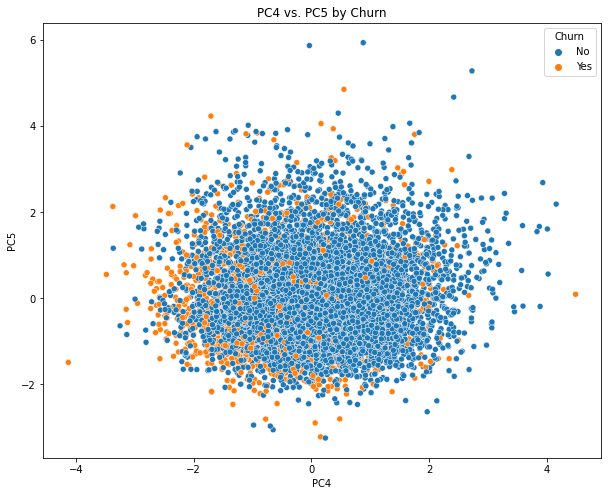

In [44]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC4', y='PC5', hue='Churn', data=total_df)
plt.xlabel('PC4')
plt.ylabel('PC5')
plt.title('PC4 vs. PC5 by Churn')
plt.show()

In [47]:
#df_scaled.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.673405,-0.972338,0.720925,-0.398778,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487
1,0.047772,-0.506592,-1.259957,-0.641954,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876
2,-0.417238,0.890646,-0.148730,-1.070885,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138
3,0.284537,-0.506592,-0.245359,-0.740525,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857
4,0.110549,-0.972338,1.445638,0.009478,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184


In [49]:
#df_scaled.to_csv('pca_final.csv')